In [1]:

import glob
import re

BASE_FOLDER = "./raw"
cities = [re.search(r".*/([A-Z]+)", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/*/")]
print(f'Found data for {len(cities)} cities: {", ".join(cities)}')

Found data for 4 cities: MOSCOW, BARCELONA, ANTWERP, BANGKOK


In [2]:
import pandas as pd
city = "BANGKOK"

df_in = pd.read_csv(f"{BASE_FOLDER}/{city}/hourly_processed_means_in_covid.csv")
df_pre = pd.read_csv(f"{BASE_FOLDER}/{city}/hourly_processed_means_pre.csv")

## Preprocessing Dataframes

df_in['region_mean_volume'].fillna(df_in['region_mean_volume'].mean(), inplace=True)
df_pre['region_mean_volume'].fillna(df_pre['region_mean_volume'].mean(), inplace=True)


df_in

,date,weekday,hour,region_id,region_mean_volume
0,2020-04-01,2,0,0,6.950762
1,2020-04-01,2,0,8,5.105836
2,2020-04-01,2,0,15,6.499926
3,2020-04-01,2,0,23,8.379363
4,2020-04-01,2,0,31,6.162632
5,2020-04-01,2,0,39,8.209338
6,2020-04-01,2,0,46,16.538279
7,2020-04-01,2,0,54,5.052358
8,2020-04-01,2,0,62,5.091794
9,2020-04-01,2,0,70,5.206035


In [3]:
df_pre

,date,weekday,hour,region_id,region_mean_volume
0,2019-04-01,0,0,0,7.722891
1,2019-04-01,0,0,8,7.327109
2,2019-04-01,0,0,15,7.692432
3,2019-04-01,0,0,23,6.865300
4,2019-04-01,0,0,31,7.928614
5,2019-04-01,0,0,39,7.442042
6,2019-04-01,0,0,46,7.407453
7,2019-04-01,0,0,54,6.773185
8,2019-04-01,0,0,62,6.621192
9,2019-04-01,0,0,70,5.908838


In [20]:
id_in = df_in.groupby(["region_id"]).median()
id_pre = df_pre.groupby(["region_id"]).median()

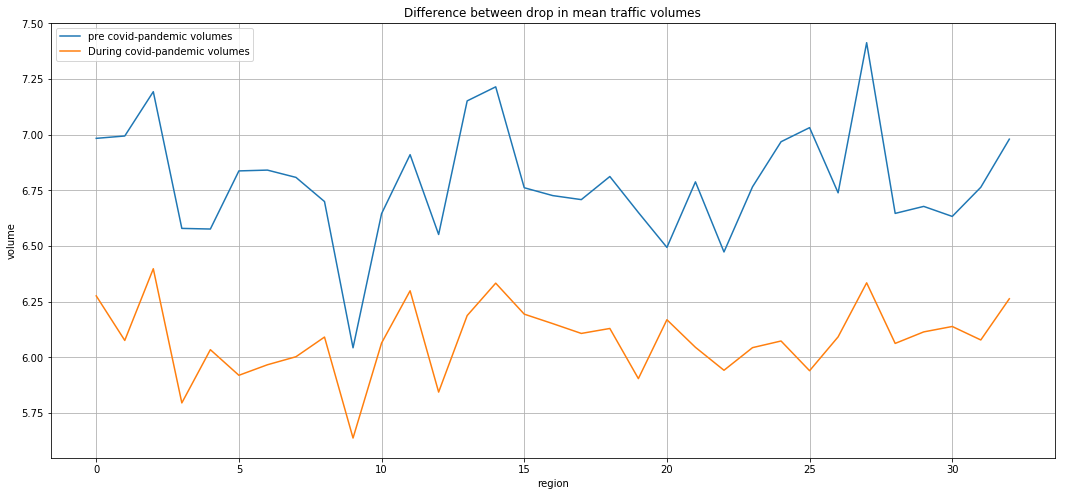

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = id_in.index
y = id_in.iloc[:,2].values
y2 = id_pre.iloc[:,2].values

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
plt.grid()
plt.title("Difference between drop in mean traffic volumes")
ax.set_xlabel("region")
ax.set_ylabel("volume")
ax.plot(y2, label="pre covid-pandemic volumes")
ax.plot(y, label="During covid-pandemic volumes")
ax.legend()
plt.show()

In [24]:
dates = df_pre.date.unique()
in_dates = df_in.date.unique()

In [25]:
region_in = df_in.groupby(["region_id","date","hour"]).mean()
region_pre = df_pre.groupby(["region_id","date","hour"]).mean()

In [35]:
filter1 = df_pre.date == dates[0]
filter2 = df_pre.region_id == 0
dpre= df_pre.copy() 
dpre.where(filter1&filter2,inplace=True)
dpre = dpre.dropna()
dpre.set_index('hour', inplace=True)
dpre

,date,weekday,region_id,region_mean_volume
hour,,,,
0.0,2019-04-01,0.0,0.0,7.722891
1.0,2019-04-01,0.0,0.0,7.052333
2.0,2019-04-01,0.0,0.0,6.851261
3.0,2019-04-01,0.0,0.0,5.809253
4.0,2019-04-01,0.0,0.0,6.166278
5.0,2019-04-01,0.0,0.0,6.246830
6.0,2019-04-01,0.0,0.0,6.684549
7.0,2019-04-01,0.0,0.0,6.800579
8.0,2019-04-01,0.0,0.0,8.285941


In [36]:
filter1 = df_in.date == in_dates[0]
filter2 = df_in.region_id == 0
di= df_in.copy() 
di.where(filter1&filter2,inplace=True)
di = di.dropna()
di.set_index('hour', inplace=True)
di

,date,weekday,region_id,region_mean_volume
hour,,,,
0.0,2020-04-01,2.0,0.0,6.950762
1.0,2020-04-01,2.0,0.0,6.407246
2.0,2020-04-01,2.0,0.0,7.313249
3.0,2020-04-01,2.0,0.0,5.820044
4.0,2020-04-01,2.0,0.0,5.485716
5.0,2020-04-01,2.0,0.0,5.668457
6.0,2020-04-01,2.0,0.0,6.055634
7.0,2020-04-01,2.0,0.0,6.284355
8.0,2020-04-01,2.0,0.0,6.207420


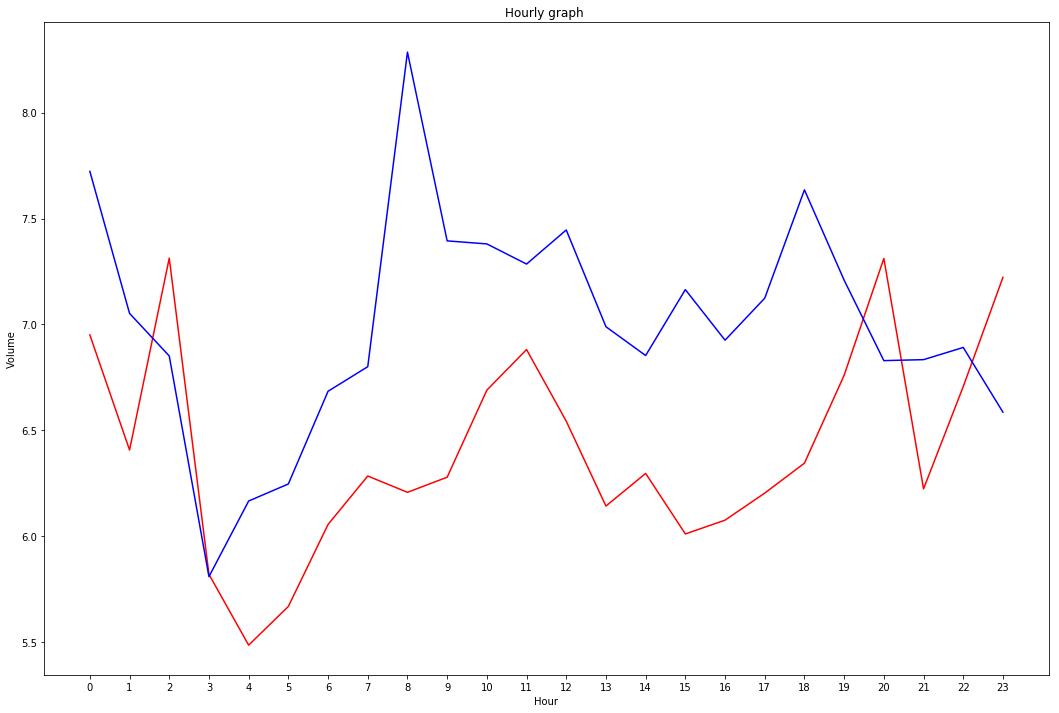

In [38]:
plt.figure(figsize=(18,12))
plt.title("Hourly graph ")
plt.xlabel("Hour")
plt.ylabel("Volume")
plt.plot(di.region_mean_volume,"r", label="During covid-pandemic volumes")
plt.plot(dpre.region_mean_volume,"b", label="pre covid-pandemic volumes")
plt.xticks(np.arange(24))
plt.show()

In [40]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.5 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 44.1 MB/s eta 0:00:01
You should consider upgrading via the '/storage/software/python-3.6.3/miniconda3/bin/python -m pip install --upgrade pip' command.


In [41]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices('region_mean_volume ~ date + weekday + hour + region_id', data=df_pre, return_type='dataframe')

y2, X2 = dmatrices('region_mean_volume ~ date + weekday + hour + region_id', data=df_in, return_type='dataframe')

In [42]:
X[:3]

,Intercept,date[T.2019-04-02],date[T.2019-04-03],date[T.2019-04-04],date[T.2019-04-05],date[T.2019-04-06],date[T.2019-04-07],date[T.2019-04-08],date[T.2019-04-09],date[T.2019-04-10],...,date[T.2019-05-09],date[T.2019-05-10],date[T.2019-05-11],date[T.2019-05-12],date[T.2019-05-13],date[T.2019-05-14],date[T.2019-05-15],weekday,hour,region_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


In [43]:
y[:3]

,region_mean_volume
0,7.722891
1,7.327109
2,7.692432


In [44]:
mod = sm.OLS(y, X)
mod2 = sm.OLS(y2, X2)

In [45]:
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:     region_mean_volume   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     37.43
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          8.40e-323
Time:                        22:36:52   Log-Likelihood:                -53948.
No. Observations:               35640   AIC:                         1.080e+05
Df Residuals:                   35593   BIC:                         1.084e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.9367      0

In [46]:
res2 = mod2.fit()       # Fit model
print(res2.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:     region_mean_volume   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     47.67
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:36:53   Log-Likelihood:                -76085.
No. Observations:               35640   AIC:                         1.523e+05
Df Residuals:                   35593   BIC:                         1.527e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.2580      0

In [47]:
df_in.dtypes

date                   object
weekday                 int64
hour                    int64
region_id               int64
region_mean_volume    float64
dtype: object

In [48]:
df_in['date'] = pd.to_datetime(df_in['date']) # convert date column to DateTime

# Adding Datetime offset to get proper datetime values for each row
df_in['datetime'] = df_in['date'] + pd.to_timedelta(df_in['hour'], unit='h') 
df_in.set_index(pd.DatetimeIndex(df_in['datetime']), inplace=True)
df_in

,date,weekday,hour,region_id,region_mean_volume,datetime
datetime,,,,,,
2020-04-01 00:00:00,2020-04-01,2,0,0,6.950762,2020-04-01 00:00:00
2020-04-01 00:00:00,2020-04-01,2,0,8,5.105836,2020-04-01 00:00:00
2020-04-01 00:00:00,2020-04-01,2,0,15,6.499926,2020-04-01 00:00:00
2020-04-01 00:00:00,2020-04-01,2,0,23,8.379363,2020-04-01 00:00:00
2020-04-01 00:00:00,2020-04-01,2,0,31,6.162632,2020-04-01 00:00:00
2020-04-01 00:00:00,2020-04-01,2,0,39,8.209338,2020-04-01 00:00:00
2020-04-01 00:00:00,2020-04-01,2,0,46,16.538279,2020-04-01 00:00:00
2020-04-01 00:00:00,2020-04-01,2,0,54,5.052358,2020-04-01 00:00:00
2020-04-01 00:00:00,2020-04-01,2,0,62,5.091794,2020-04-01 00:00:00


In [49]:
df_pre['date'] = pd.to_datetime(df_pre['date']) # convert date column to DateTime

# Adding Datetime offset to get proper datetime values for each row
df_pre['datetime'] = df_pre['date'] + pd.to_timedelta(df_pre['hour'], unit='h')
df_pre.set_index(pd.DatetimeIndex(df_pre['datetime']), inplace=True)
df_pre

,date,weekday,hour,region_id,region_mean_volume,datetime
datetime,,,,,,
2019-04-01 00:00:00,2019-04-01,0,0,0,7.722891,2019-04-01 00:00:00
2019-04-01 00:00:00,2019-04-01,0,0,8,7.327109,2019-04-01 00:00:00
2019-04-01 00:00:00,2019-04-01,0,0,15,7.692432,2019-04-01 00:00:00
2019-04-01 00:00:00,2019-04-01,0,0,23,6.865300,2019-04-01 00:00:00
2019-04-01 00:00:00,2019-04-01,0,0,31,7.928614,2019-04-01 00:00:00
2019-04-01 00:00:00,2019-04-01,0,0,39,7.442042,2019-04-01 00:00:00
2019-04-01 00:00:00,2019-04-01,0,0,46,7.407453,2019-04-01 00:00:00
2019-04-01 00:00:00,2019-04-01,0,0,54,6.773185,2019-04-01 00:00:00
2019-04-01 00:00:00,2019-04-01,0,0,62,6.621192,2019-04-01 00:00:00


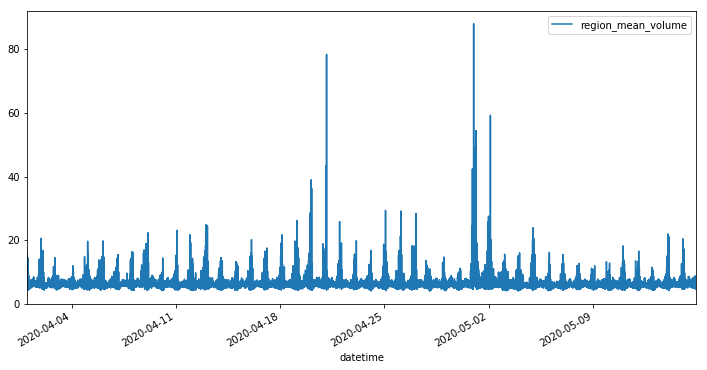

In [50]:
df_in.plot(x='datetime', y='region_mean_volume', figsize=(12,6))

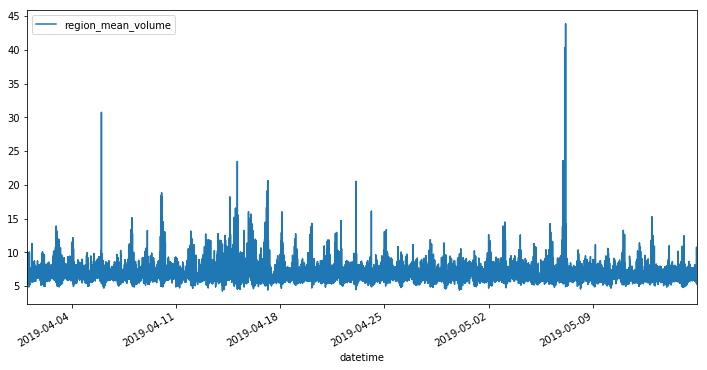

In [51]:
df_pre.plot(x='datetime', y='region_mean_volume', figsize=(12,6))

In [52]:
dpre = df_pre.copy() 
dpre.where((df_pre.region_id == 0), inplace=True)
dpre = dpre.dropna()
dpre

,date,weekday,hour,region_id,region_mean_volume,datetime
datetime,,,,,,
2019-04-01 00:00:00,2019-04-01,0.0,0.0,0.0,7.722891,2019-04-01 00:00:00
2019-04-01 01:00:00,2019-04-01,0.0,1.0,0.0,7.052333,2019-04-01 01:00:00
2019-04-01 02:00:00,2019-04-01,0.0,2.0,0.0,6.851261,2019-04-01 02:00:00
2019-04-01 03:00:00,2019-04-01,0.0,3.0,0.0,5.809253,2019-04-01 03:00:00
2019-04-01 04:00:00,2019-04-01,0.0,4.0,0.0,6.166278,2019-04-01 04:00:00
2019-04-01 05:00:00,2019-04-01,0.0,5.0,0.0,6.246830,2019-04-01 05:00:00
2019-04-01 06:00:00,2019-04-01,0.0,6.0,0.0,6.684549,2019-04-01 06:00:00
2019-04-01 07:00:00,2019-04-01,0.0,7.0,0.0,6.800579,2019-04-01 07:00:00
2019-04-01 08:00:00,2019-04-01,0.0,8.0,0.0,8.285941,2019-04-01 08:00:00


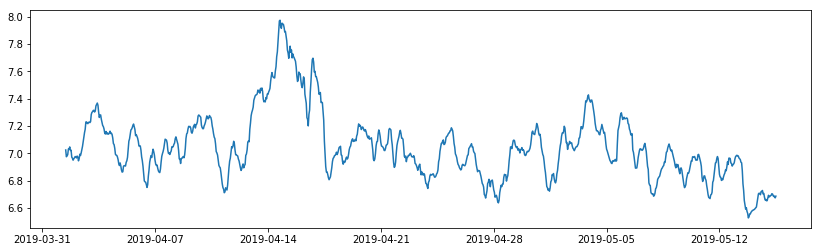

In [53]:
res = sm.tsa.seasonal_decompose(dpre.region_mean_volume, model='multiplicative', period=23)
trend = res.trend
seasonal = res.seasonal
plt.figure(figsize=(14,4))
plt.plot(trend)
plt.show()

In [56]:
din = df_in.copy() 
din.where((din.region_id == 0), inplace=True)
din = din.dropna()
din

res2 = sm.tsa.seasonal_decompose(din.region_mean_volume, model='multiplicative', period=23)
trend2 = res2.trend
seasonal2 = res2.seasonal

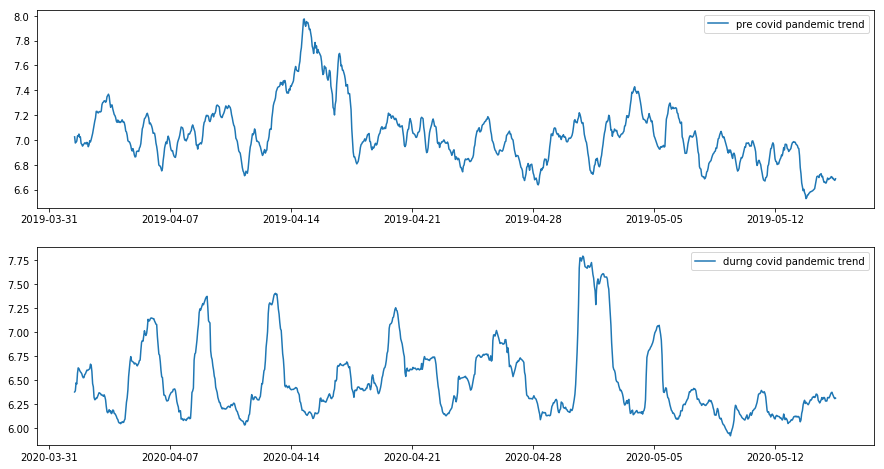

In [58]:
fig, axs = plt.subplots(2, 1, figsize=(15, 2 * 4))

axs[0].plot(trend, label="pre covid pandemic trend")
axs[0].legend()
axs[1].plot(trend2, label="durng covid pandemic trend")
axs[1].legend()
fig.savefig("Seasonal difference.png")